# Jireh Kids - Sales Analysis

## Task 1: Merge all years sales files in a Single CSV file

In [9]:
import pandas as pd
import os

In [113]:
files = [file for file in os.listdir('./sales_data')]
all_months_data = pd.DataFrame()


for file in files:
    df = pd.read_excel("./sales_data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_sales.csv", index=False)

#### Read in updated DataFrame

In [11]:
all_data_df = pd.read_csv("all_sales.csv")
all_data_df.head(5)

,FECHA,CANTIDAD,U.M.,DESCRIPCIÓN,PRECIO_VENTA,TOTAL,OBSERVACIONES
0,2/4/2024,96,uni.,OVEJERAS,5.0,480.0,NaN
1,2/4/2024,96,uni.,ECONOMICAS,2.5,240.0,NaN
2,2/8/2024,100,uni.,OVEJERAS,5.0,500.0,NaN
3,2/10/2024,60,uni.,ECONOMICAS,2.5,150.0,NaN
4,2/18/2024,48,uni.,OVEJERAS,5.0,240.0,NaN


## EDA

#### Dataset info

In [15]:
all_data_df.info()
print('\n')

all_data_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FECHA          43 non-null     object 
 1   CANTIDAD       44 non-null     int64  
 2   U.M.           44 non-null     object 
 3   DESCRIPCIÓN    44 non-null     object 
 4   PRECIO_VENTA   44 non-null     float64
 5   TOTAL          44 non-null     float64
 6   OBSERVACIONES  2 non-null      object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.5+ KB




,CANTIDAD,PRECIO_VENTA,TOTAL
count,44.000000,44.000000,44.000000
mean,90.340909,9.595455,474.752273
std,65.904068,23.762575,390.541757
min,1.000000,2.500000,60.000000
25%,48.000000,4.750000,240.000000
50%,76.000000,5.200000,388.300000
75%,112.000000,5.500000,501.500000
max,264.000000,160.900000,1795.200000


#### Delete columns

In [18]:
# Delete columns 'OBSERVACIONES', 'U.M.'
removed_columns_df = all_data_df.drop(columns=['OBSERVACIONES', 'U.M.'])

removed_columns_df.info()
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FECHA         43 non-null     object 
 1   CANTIDAD      44 non-null     int64  
 2   DESCRIPCIÓN   44 non-null     object 
 3   PRECIO_VENTA  44 non-null     float64
 4   TOTAL         44 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 1.8+ KB




#### Delete 'NA' rows

In [21]:
# Materialize the view (.copy()) and delete rows with NA values from "FECHA" column
removed_no_date_rows_df = removed_columns_df.dropna(subset=['FECHA']).copy()

removed_no_date_rows_df.info()
print('\n')
# removed_no_date_rows_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 43
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FECHA         43 non-null     object 
 1   CANTIDAD      43 non-null     int64  
 2   DESCRIPCIÓN   43 non-null     object 
 3   PRECIO_VENTA  43 non-null     float64
 4   TOTAL         43 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.0+ KB




#### Convert 'FECHA' column to datetime format

In [24]:
removed_no_date_rows_df['FECHA'] = pd.to_datetime(removed_no_date_rows_df['FECHA'], format='%m/%d/%Y')

## Task 2: Add Month Column

In [27]:
# Extract month from datetime
removed_no_date_rows_df['Mes'] = removed_no_date_rows_df['FECHA'].dt.month

# Transform 'Mes' column to int type
removed_no_date_rows_df['Mes'] = removed_no_date_rows_df['Mes'].astype(int)

# Resulting DataFrame
print(removed_no_date_rows_df)

        FECHA  CANTIDAD           DESCRIPCIÓN  PRECIO_VENTA   TOTAL  Mes
0  2024-02-04        96              OVEJERAS           5.0   480.0    2
1  2024-02-04        96            ECONOMICAS           2.5   240.0    2
2  2024-02-08       100              OVEJERAS           5.0   500.0    2
3  2024-02-10        60            ECONOMICAS           2.5   150.0    2
4  2024-02-18        48              OVEJERAS           5.0   240.0    2
5  2024-02-18        40       OVEJERAS LLANAS           5.5   220.0    2
6  2024-02-26       132            ECONOMICAS           2.5   330.0    2
7  2024-02-26        72              OVEJERAS           5.0   360.0    2
8  2024-02-26        24            ECONOMICAS           2.5    60.0    2
9  2024-03-05        48              OVEJERAS           5.0   240.0    3
10 2024-03-07        96       OVEJERAS LLANAS           5.5   528.0    3
11 2024-03-11        80            ECONOMICAS           2.5   200.0    3
12 2024-03-11        88               BURBUJA      

### Question 1: What was the best month for sales? How much was earned that month?

In [30]:
monthly_sales_df = removed_no_date_rows_df.groupby('Mes').sum(numeric_only=True)
print(monthly_sales_df)

     CANTIDAD  PRECIO_VENTA   TOTAL
Mes                                
2         668          35.5  2580.0
3         516          36.5  2658.0
4         826         116.2  5073.4
5         878          36.2  5068.2
6         488          20.0  1954.0
7         598          16.9  3394.6


In [32]:
import matplotlib.pyplot as plt

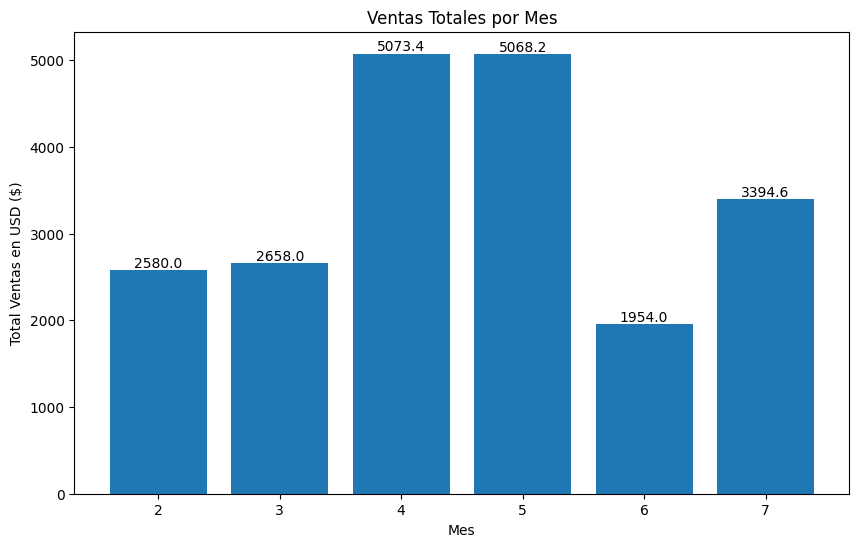

El total de ventas hasta la fecha es: $20728.20


In [33]:
months = monthly_sales_df.index
totals = monthly_sales_df['TOTAL']

plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico si es necesario
bars = plt.bar(months, totals)

plt.xlabel('Mes')
plt.ylabel('Total Ventas en USD ($)')
plt.title('Ventas Totales por Mes')
print('\n')

# Agregar etiquetas de datos encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(months)
plt.show()

# Total Sales till date from 'TOTAL' column
total_ventas = monthly_sales_df['TOTAL'].sum()

print(f"El total de ventas hasta la fecha es: ${total_ventas:.2f}")

### Question 2: What is the Best Seller product? Why do you think it sold the most?

In [36]:
best_seller_product_df = removed_no_date_rows_df.groupby('DESCRIPCIÓN').sum(numeric_only=True)
best_seller_product_df = best_seller_product_df.sort_values(by='CANTIDAD', ascending=False)

print(best_seller_product_df)
#best_seller_product_ordered_df.head(5)

                      CANTIDAD  PRECIO_VENTA   TOTAL  Mes
DESCRIPCIÓN                                              
OVEJERAS                   836          55.0  4180.0   38
ECONOMICAS                 772          22.5  1930.0   30
AJUAR 12 PIEZAS            484          12.0  2904.0   12
AJUAR 9 PIEZAS             484          10.8  2613.6   12
OVEJERAS LLANAS            416          38.5  2288.0   28
BURBUJA                    292          16.5  1606.0   13
AJUAR 15 PIEZAS            264           6.8  1795.2    5
AJUAR 6 PIEZAS             132           4.0   528.0    6
ABRAZADOR CON CARITA       126          15.0   945.0    7
CHOMPAS OSITO               80           3.0   240.0    6
BODYS #0                    22          17.8   391.6    4
BODYS #1                    22          18.8   413.6    4
BODYS #2                    22          19.8   435.6    4
BODYS #3                    22          20.8   457.6    4


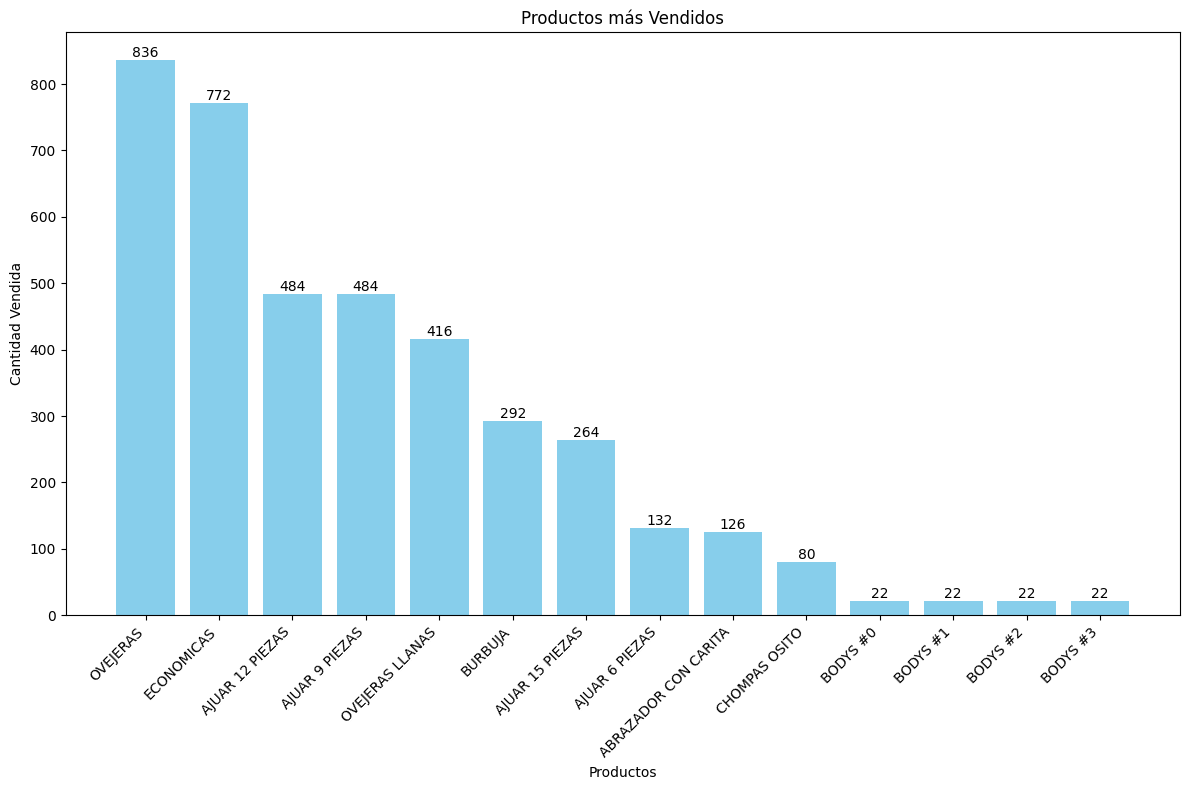

In [40]:
#products = [product for product, df in best_seller_product_df.groupby('DESCRIPCIÓN')]
products = best_seller_product_df.index.tolist()
amount = best_seller_product_df['CANTIDAD'].tolist()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))  
bars = plt.bar(products, amount, color='skyblue')

plt.xlabel('Productos')
plt.ylabel('Cantidad Vendida')
plt.title('Productos más Vendidos')
print('\n')

# Agregar etiquetas de datos encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Ajustar las etiquetas del eje x para que no se sobrepongan
plt.tight_layout()  # Ajustar el diseño para evitar el corte de etiquetas

plt.show()

In [92]:
# Filtrar productos por total de ventas inferiores a $200
ropa_df = best_seller_product_df[best_seller_product_df['CANTIDAD'] <= 200]

ropa_df.head(100)

,CANTIDAD,PRECIO_VENTA,TOTAL,Mes
DESCRIPCIÓN,,,,
AJUAR 6 PIEZAS,132,4.0,528.0,6
ABRAZADOR CON CARITA,126,15.0,945.0,7
CHOMPAS OSITO,80,3.0,240.0,6
BODYS #0,22,17.8,391.6,4
BODYS #1,22,18.8,413.6,4
BODYS #2,22,19.8,435.6,4
BODYS #3,22,20.8,457.6,4


Mean Squared Error: 6197.692669826853


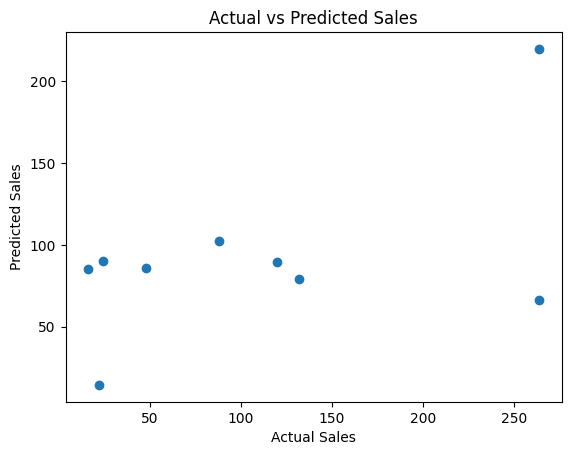

In [94]:
# Supongamos que 'removed_no_date_rows_df' es tu DataFrame original
removed_no_date_rows_df['FECHA'] = pd.to_datetime(removed_no_date_rows_df['FECHA'], format='%m/%d/%Y')

removed_no_date_rows_df['FECHA'] = pd.to_datetime(removed_no_date_rows_df['FECHA'])
removed_no_date_rows_df['Año'] = removed_no_date_rows_df['FECHA'].dt.year
removed_no_date_rows_df['Mes'] = removed_no_date_rows_df['FECHA'].dt.month

# Codificar variables categóricas
df = pd.get_dummies(removed_no_date_rows_df, columns=['DESCRIPCIÓN'], drop_first=True)

# Seleccionar características y la variable objetivo
X = df[['PRECIO_VENTA', 'Mes', 'Año'] + [col for col in df.columns if col.startswith('DESCRIPCIÓN_')]]
y = df['CANTIDAD']

# Dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Visualizar los resultados
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.show()
